# Análisis para Call Me Maybe

## Entrega 1: Descomposición del proyecto.

### Antecedentes.

Call Me Maybe es una empresa que brinda un servicio de telefonía virtual que busca identificar a sus operadores menos eficaces y poder llevar esta información de forma rápida, eficiente y de forma oportuna a sus supervisores y que estos puedan tomar las acciones pertinentes para mejorar el funcionamiento del equipo.

Se nos han compartido dos bases de datos en formato CSV que contienen los registros de llamadas (internos y externos) y la información de los clientes de Call Me Maybe (CMM) para que podamos encontrar el desempeño de los operadores en su trabajo.

CMM considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas y un tiempo de espera prolongado para contestar las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas, un número reducido de ellas también será un signo de ineficacia.

### Objetivos del trabajo.

El principal objetivo del trabajo será poder analizar la información de forma que obtengamos las características más importantes para identificar de forma sencilla y eficiente a los operadores ineficaces.

### Etapas del Proyecto.

Para llevar a cabo con éxito este proyecto y poder cumplir de forma satisfactoria el objetivo de identificar a los operadores ineficaces para que los supervisores de estos puedan tomar acciones oportunas, se llevarán a cabo las siguientes etapas:
1) Análisis exploratorio de la información recibida: Iniciaremos por revisar, analizar y comprender la información que se nos ha hecho llegar, de modo que estemos familiarizados con la materia prima que tenemos para cumplir con nuestra misión.
2) Planteamiento de hipótesis inicial sobre los operadores ineficaces: Plantearemos una hipótesis mediante la cual podamos guiar nuestros esfuerzos en torno a un conjunto de variables que, a través de haber realizado el análisis exploratorio, hayamos identificado como las cuales pueden tener mayor peso a la hora de identificar a los operadores ineficaces.
3) Corrección y mejoramiento de los datos: En esta etapa se trabajarán los datos que se tienen de modo que se homogenicen, se trabajen los valores ausentes o nulos, registros duplicados, se generen las tablas auxiliares y adicionales con las cuales podamos trabajar.
4) Presentación de información preliminar: Una vez que contemos con los datos en un formato y estado que consideremos óptimo, presentaremos gráficos y datos puntuales que nos permitan obtener conclusiones preliminares en torno a la información pero, sobretodo, a la hipótesis.
5) Identificar características principales: De la mano con el paso **4)**, se identificarán cuales son las características más importantes para construir nuestro modelo automatizado de datos que nos permita identificar a los operadores ineficaces.
6) Construcción del algoritmo: Con la librería de Science Learning Kit (skit-learn) de Python, eligiremos el algoritmo que mejor se adapte a las características que hemos identificado para poder identificar que operadores son más o menos ineficaces.
7) Puesta en marcha del algoritmo: Para identificar a los operadores ineficaces.
8) Obtencnión de conclusiones.

De momento es difícil ser más puntual en el desglose de las etapas de trabajo pues aún no se revisan los datos, sin embargo, en cada una de las etapas se irán describiendo los procesos seguidos, lo que se espera y conclusiones parciales que nos ayudarán a poder dar seguimiento a lo hecho y presentarlo cuando sea necesario al equipo de CMM quienes nos han contratado.

## Entrega 2: Análisis de la información.

## Documentos adicionales.

Como parte de este trabajo se han realizado Dashboards en MS Power BI y Tableau para visualizar los datos recibidos de forma rápida, sencilla y eficiente. Así mismo se ha elaborado una presentación en PDF con los puntos más importantes del trabajo, esto se encuentra disponible en los siguientes hipervínculos:
1) Tableau Public Tablero 1: https://public.tableau.com/views/2025-06_CallMeMaybe_Dashboard/DS_1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link
2) Tableau Public Tablero 2: https://public.tableau.com/views/2025-06_CallMeMaybe_Dashboard_2/DS_2?:language=es-ES&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link
3) Carpeta de Google Drive con archivo de Tableau, Power BI y Presentación en PDF: https://drive.google.com/drive/folders/13c4xEhWWI9Qqv0Yn7PYV9v8nyfxm8hl-?usp=sharing

### Importación de librerías y datos de trabajo.

Iniciaremos importando las librerías con las cuales trabajaremos y los datos a analizar.

In [1]:
# Importación de librerías.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
# Importamos los datos como DataFrames de Pandas.
reg_tel = pd.read_csv('telecom_dataset_us.csv')

clientes = pd.read_csv('telecom_clients_us.csv')

In [3]:
# Previsualización de los datos.
reg_tel.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


***Nota al revisor: Ni en la descripción de la base de datos en Notion, ni por contexto, se entiende el significado de la columna*** calls_count ***, puesto que no tendría sentido que dentro de un mismo registro (fila) se contabilicen varias llamadas telefónicas, más adelante se despreciará esta columna.***

Vemos que la información se ha importado de forma correcta.

### Análisis exploratorio de la información.

Como se ha mencionado antes, este es el primer paso en este proyecto será explorar los datos de forma que nos familiaricemos con el contenido de las tablas y podamos identificar que se requiere corregir y poder identificar las variables que elegiremos para plantear nuestra hipótesis.

#### Análisis de los registros de llamadas.

Iniciamos explorando la información sobre registro de llamadas.

In [4]:
# Revisamos los tipos de datos y valores nulos/ausentes.
reg_tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


Ya con este primer paso que hemos tomado podemos identificar un punto crítico en nuestro trabajo, la usencia de cerca de 8,000 registros del ID del Operador. Será completamente necesario eliminar los registros que no cuenten con este dato pues, el objetivo que tenemos, es identificar a los *operadores* que son ineficaces y, si no conocemos al operador de una llamada, dicha llamada no nos es útil para evaluar al operador.

Leyendo los nombres de columnas, tipos de dato y viendo la previsualización de la tabla, podemos identificar el uso de las columnas como sigue:
* user_id: ID de la cuenta de cliente.
* date: fecha en la que se recuperaron las estadísticas.
* direction: "dirección" de llamada (out para saliente, in para entrante).
* internal: si la llamada fue interna (entre los operadores de un cliente).
* operator_id: identificador del operador.
* is_missed_call: si fue una llamada perdida.
* calls_count: número de llamadas.
* call_duration: duración de la llamada (sin incluir el tiempo de espera).
* total_call_duration: duración de la llamada (incluido el tiempo de espera).

Asumiremos que el tiempo de las llamadas está dado en minutos y también observamos que para obtener el tiempo de espera deberemos restar call_duration a total_call_duration.

Una primer suposición respecto a los datos faltantes de ID de operador es que quizá se trata de llamadas perdidas que no alcanzaron a generar registro, lo probamos.

In [5]:
# Contamos cuantas filas no tienen un operator_id.
print(f"ID's de operador faltantes: {reg_tel['operator_id'].isnull().sum()}")

# Contamos cuantas filas que no tienen un operator_id también tienen True en is_missed_call:
print(f"ID's de operador faltantes para llamadas perdidas: {reg_tel[reg_tel['is_missed_call'] == True]['operator_id'].isnull().sum()}")

ID's de operador faltantes: 8172
ID's de operador faltantes para llamadas perdidas: 8050


Efectivamente coincide que la mayoría de los registros sin ID de operador registrado son llamadas perdidas, sin embargo, no todos.

Una última observación inicial a esta tabla es que maneja los ID's de operador como números decimales cuando deberían de ser enteros. Se revisará a profundidad adelante y se corregirá en caso de ser necesario.

Revisamos si hay registros duplicados.

In [6]:
# Contamos registros duplicados.
print(f"Registros duplicados: {reg_tel.duplicated().sum()}")

Registros duplicados: 4900


Eliminaremos estos registros más adelante para evitar duplicidad en los datos con los que trabajaremos.

#### Análisis de los clientes.

Ahora haremos lo propio para los datos de los clientes.

In [7]:
# Revisamos tipos de datos y valores nulos/ausentes en el DataFrame de clientes.
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


La tabla de clientes no cuenta con valores ausentes pero maneja la fecha como si fuera un texto, esto lo cambiaremos más adelante.

Revisamos cuantas tarifas se tienen en venta.

In [8]:
# Contamos la cantidad de tarifas distintas.
print(f"Tarifas distintas: \n{clientes['tariff_plan'].value_counts()}")

Tarifas distintas: 
C    395
B    261
A     76
Name: tariff_plan, dtype: int64


Tenemos tres tarifas y van de más popular a menos en el siguiente orden: C, B y A. Parece que podemos asumir que la tarifa A es la más premium o completa y la B y C son de menor nivel respectivamente.

Contamos si tenemos registros duplicados.

In [9]:
# Revisamos por registros duplicados.
print(f"Registros duplicados: {clientes.duplicated().sum()}")

Registros duplicados: 0


### Hipótesis inicial.

La información que se nos mandó cuenta con un número relativamente bajo de columnas en total (9 + 3). Cada columna representa una variable, sin embargo, las columnas de identificador no son variables válidas para plantear una hipótesis.

Se observa que una de las características de los clientes es su nivel en cuanto al plan en el que están inscritos y consideramos que esto puede cobrar relevancia ya que sería de esperarse que clientes que tienen un plan tarifario superior sean suceptibles a tener llamadas más largas con los operadores.

En base a lo observado de la información, se plantea la siguiente hipótesis:

**Los operadores de clientes del plan A tenderán a estar más tiempo en llamada con sus clientes que los de otros planes, así mismo, el tiempo de espera para estas llamadas será menor.**

La hipótesis anterior no está respaldada por nada más que la experiencia anterior del analista (yo) y la lectura preliminar que se ha realizado a los datos pero, de ser cierta nos ayudaría a poder distinguir facilmente algunas características clave para discernir entre operadores ineficientes y operadores que ocupan mucho tiempo debido a las demandas de los clientes y, en última instancia, plantear estrategias a los supervisores y equipo directivo de CMM en cuanto a una división de clientes más eficiente.

### Corrección y mejoramiento de datos.

Ya hemos apuntado algunos cambios que debemos realizar para los datos, ahora los aplicaremos.

#### Acciones a los registros de llamadas.

1) Eliminar registros donde falte el ID del operador.
2) Eliminar registros duplicados.
3) Cambiar a número entero el tipo de dato para ID del operador.
4) Calcular el tiempo de espera de la llamada.

In [10]:
# Eliminamos las filas con valores nulos en operator_id
reg_tel = reg_tel.dropna(subset=['operator_id'])

In [11]:
# Eliminamos registros duplicados.
reg_tel = reg_tel.drop_duplicates()

In [12]:
# Aplicamos info() para verificar los cambios.
reg_tel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41546 entries, 1 to 53899
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              41546 non-null  int64  
 1   date                 41546 non-null  object 
 2   direction            41546 non-null  object 
 3   internal             41491 non-null  object 
 4   operator_id          41546 non-null  float64
 5   is_missed_call       41546 non-null  bool   
 6   calls_count          41546 non-null  int64  
 7   call_duration        41546 non-null  int64  
 8   total_call_duration  41546 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 2.9+ MB


Tenemos cerca de 50 registros adicionales que tienen valor ausente en la columna internal, la que nos valida si la llamada es interna o no; al ser tan pocos y no poder sustituir por el promedio o la moda pues no contamos con suficiente información para validar que tan correcto sería esto y que se trata de solo de menos del 0.01% de los datos, también los eliminaremos de nuestro DataFrame.

In [13]:
# Borramos las filas con valores nulos en internal.
reg_tel = reg_tel.dropna(subset=['internal'])

In [14]:
# Contamos cuantos ID's de operador hay únicos.
print(f"ID's de operador únicos: {reg_tel['operator_id'].nunique()}")

# Pasamos los ID's de operador a tipo int.
reg_tel['operator_id'] = reg_tel['operator_id'].astype('int64')

# Validamos que no hayamos perdido ningún ID de operador.
print(f"ID's de operador únicos: {reg_tel['operator_id'].nunique()}")

ID's de operador únicos: 1092
ID's de operador únicos: 1092


En este paso, al contar la cantidad de operadores únicos, podemos validar, también que tenemos un promedio de 40 llamadas por operador.

In [15]:
# Calculamos el tiempo de espera en la llamada.
reg_tel['wait_time'] =reg_tel['total_call_duration'] - reg_tel['call_duration']

In [16]:
# Cambiamos el tipo de dato de la fecha.
reg_tel["date"] = pd.to_datetime(reg_tel["date"],utc=True)

#Validamos.
print("Formato de datos de la fecha:",reg_tel["date"].dtype)

Formato de datos de la fecha: datetime64[ns, UTC]


#### Acciones a la lista de clientes.

1) Pasar la columna de fecha de inscripción a un tipo de dato de fecha.

In [17]:
# Convertimos la columna date_start a fecha.
clientes['date_start'] = pd.to_datetime(clientes['date_start'], format = '%Y-%m-%d')

In [18]:
# Validamos el cambio.
clientes['date_start'].dtype

dtype('<M8[ns]')

### Presentación preliminar de los datos.

En esta sección presentaremos algunos datos estadísticos y gráficos que nos permitan obtener conclusiones parciales más detalladas de los datos que tenemos. Nos enfocaremos principalmente en estos 4 ejes:
1) Describir al operador promedio.
2) Verificar la distribución de datos dividida por la tarifa del cliente a quien se está atendiendo.
3) Identificar grupos de operadores de acuerdo con sus características.
4) Crear una escala que nos permita medir la ineficiencia de un operador.

In [19]:
# Iniciamos con una división en columnas binarias a la columna "is_missed_call" para tener un conteo de llamadas tomadas y perdidas.
reg_tel["perdida"] = np.where(reg_tel["is_missed_call"]==True,1,0)
reg_tel["conectada"] = np.where(reg_tel["is_missed_call"]==False,1,0)

# Hacemos lo mismo para "internal".
reg_tel["interna"] = np.where(reg_tel["internal"]==True,1,0)
reg_tel["externa"] = np.where(reg_tel["internal"]==False,1,0)

# Por último, para "direction".
reg_tel["in"] = np.where(reg_tel["direction"]=="in",1,0)
reg_tel["out"] = np.where(reg_tel["direction"]=="out",1,0)

# Validamos.
reg_tel.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,perdida,conectada,interna,externa,in,out
1,166377,2019-08-04 21:00:00+00:00,out,True,880022,True,3,0,5,5,1,0,1,0,0,1
2,166377,2019-08-04 21:00:00+00:00,out,True,880020,True,1,0,1,1,1,0,1,0,0,1
3,166377,2019-08-04 21:00:00+00:00,out,True,880020,False,1,10,18,8,0,1,1,0,0,1
4,166377,2019-08-04 21:00:00+00:00,out,False,880022,True,3,0,25,25,1,0,0,1,0,1
5,166377,2019-08-04 21:00:00+00:00,out,False,880020,False,2,3,29,26,0,1,0,1,0,1


La agrupación se dará como sigue:
* Conteo de valores únicos para columna *date* para obtener el número de días que los operadores trabajaron.
* Suma de *call_duration*, *total_call_duration* y *wait_time* para obtener el total de minutos de llamadas, tiempo total del teléfono y tiempo de espera, respectivamente.
* Suma de *perdida*, *conectada*, *interna*, *externa*, *in* y *out* para obtener el total de llamadas con estas características.
* Conteo de valores únicos de *user_id* para poder conocer a cuantos usuarios atiende cada operador.

In [20]:
# Agrupamos por id del operador.
operadores = reg_tel.groupby('operator_id').agg({"date":"nunique","call_duration":"sum","wait_time":"sum","total_call_duration":"sum",
                                                 "perdida":"sum","conectada":"sum","interna":"sum","externa":"sum","in":"sum","out":"sum",
                                                 "user_id":"nunique"}).rename(columns={"date":"dias_trab","call_duration":"dur_llam","wait_time":"dur_esp","total_call_duration":"dur_tot",
                                                 "perdida":"perd_tot","conectada":"conec_tot","interna":"int_tot","externa":"ext_tot","in":"in_tot","out":"out_tot",
                                                 "user_id":"usuarios_tot"})

# Presentamos.
operadores.head()

,dias_trab,dur_llam,dur_esp,dur_tot,perd_tot,conec_tot,int_tot,ext_tot,in_tot,out_tot,usuarios_tot
operator_id,,,,,,,,,,,
879896,50,63862,12275,76137,47,70,15,102,21,96,1
879898,84,257389,103890,361279,89,137,15,211,56,170,1
880020,14,2245,280,2525,6,14,3,17,7,13,1
880022,42,15147,3778,18925,29,41,8,62,8,62,1
880026,77,153326,22200,175526,87,95,13,169,18,164,1


Con el método describe() obtenemos algunos datos estadísticos básicos antes de graficar.

In [21]:
# Aplicamos describe().
operadores.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
dias_trab,1092.0,17.99,18.77,1.0,3.75,12.0,26.25,97.0
dur_llam,1092.0,38411.09,176829.31,0.0,426.00,5473.5,33840.75,4363953.0
dur_esp,1092.0,11862.67,64510.31,0.0,138.75,1008.0,7692.25,1443002.0
dur_tot,1092.0,50273.76,239156.19,0.0,568.00,6674.5,43829.25,5733237.0
perd_tot,1092.0,12.92,18.39,0.0,1.00,5.0,18.00,119.0
conec_tot,1092.0,25.08,32.22,0.0,4.00,13.0,33.00,219.0
int_tot,1092.0,4.88,12.12,0.0,0.00,1.0,3.00,85.0
ext_tot,1092.0,33.11,44.33,0.0,4.00,16.0,41.00,281.0
in_tot,1092.0,11.61,18.10,0.0,0.00,3.0,15.00,107.0
out_tot,1092.0,26.39,36.62,0.0,1.00,10.0,39.00,228.0


Algo interesante a observar es que para cada operador solo hay un único usuario por atender. De hecho, es importante observar que hay más de un operador por usuario.

Por lo anterior, se considera que todos los operadores de la información recibida están activos a lo largo de todo el tiempo.

Por otro lado, ya con el método describe() es fácil ver que hay una parte de los operadores que tienen números mucho más altos que los demás en todos los rubros. Las siguientes gráficas nos ayudarán a visualizar mejor los datos.

In [22]:
# Pasamos el id de operador a una columna:
operadores.reset_index(inplace=True)
operadores.rename(columns={'operator_id':'id_operador'},inplace=True)

In [23]:
# Obtenemos el id del operador con el id del usuario a quien atendió.
ope_usu = reg_tel.groupby('operator_id').agg({'user_id':'unique'}).reset_index().rename(columns={'operator_id':'id_operador','user_id':'id_cliente'})

# Revisamos el resultado.
ope_usu.head()

,id_operador,id_cliente
0,879896,[166406]
1,879898,[166406]
2,880020,[166377]
3,880022,[166377]
4,880026,[166377]


In [24]:
# Retiramos corchetes del id del cliente puesto que ahorita está en formato de texto con corchetes iniciales y finales.
ope_usu['id_cliente'] = ope_usu['id_cliente'].apply(lambda x: str(x).strip('[]'))

# Convertimos el id del cliente a un entero de tipo int64.
ope_usu['id_cliente'] = ope_usu['id_cliente'].astype('int64')

# Validamos.
ope_usu.head()

,id_operador,id_cliente
0,879896,166406
1,879898,166406
2,880020,166377
3,880022,166377
4,880026,166377


In [25]:
# Ligamos nuestra nueva tabla a la de clientes para obtener la tarifa del cliente.
ope_usu = ope_usu.merge(clientes[['user_id','tariff_plan']], left_on='id_cliente', right_on='user_id', how='left')

# Quitamos la columna duplicada de user_id.
ope_usu = ope_usu.drop(columns=['user_id'])

# Revisamos el resultado.
ope_usu.head()

,id_operador,id_cliente,tariff_plan
0,879896,166406,B
1,879898,166406,B
2,880020,166377,B
3,880022,166377,B
4,880026,166377,B


In [26]:
# Conectamos los df que hemos construido para obtener los datos de llamadas de los operadores y la tarifa de los clientes.
operadores = operadores.merge(ope_usu, left_on='id_operador', right_on='id_operador',how='left')

# El resultado.
operadores.head()

,id_operador,dias_trab,dur_llam,dur_esp,dur_tot,perd_tot,conec_tot,int_tot,ext_tot,in_tot,out_tot,usuarios_tot,id_cliente,tariff_plan
0,879896,50,63862,12275,76137,47,70,15,102,21,96,1,166406,B
1,879898,84,257389,103890,361279,89,137,15,211,56,170,1,166406,B
2,880020,14,2245,280,2525,6,14,3,17,7,13,1,166377,B
3,880022,42,15147,3778,18925,29,41,8,62,8,62,1,166377,B
4,880026,77,153326,22200,175526,87,95,13,169,18,164,1,166377,B


Graficamos para apreciar mejor la distribución de los datos por operador.

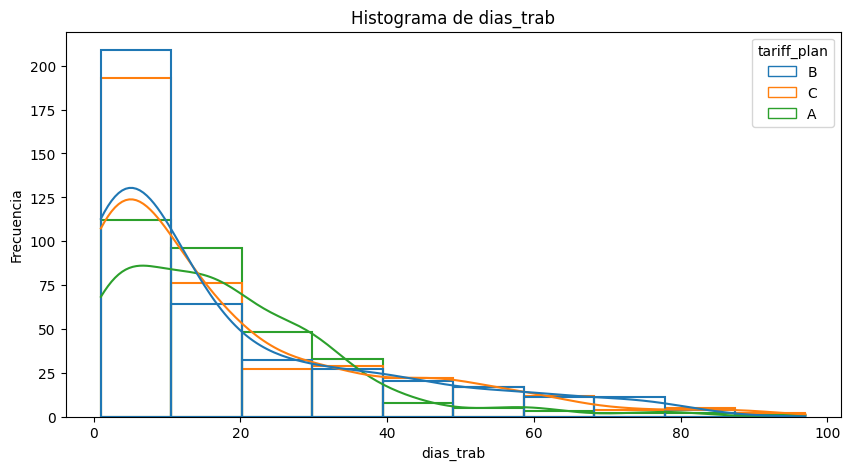

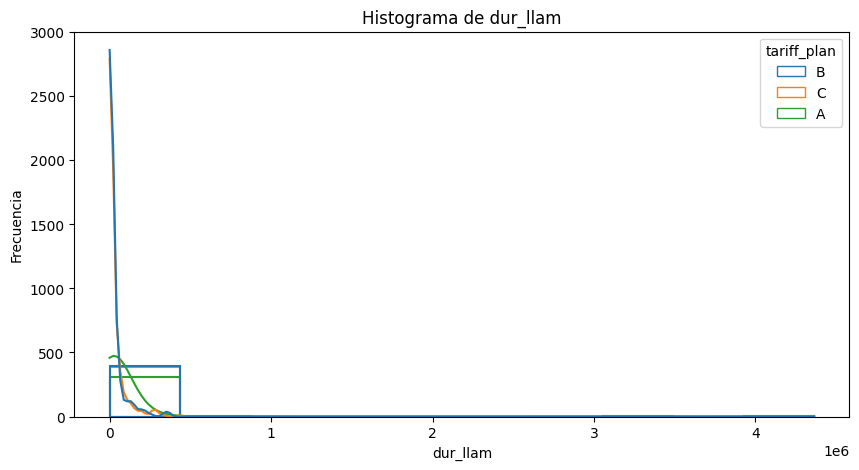

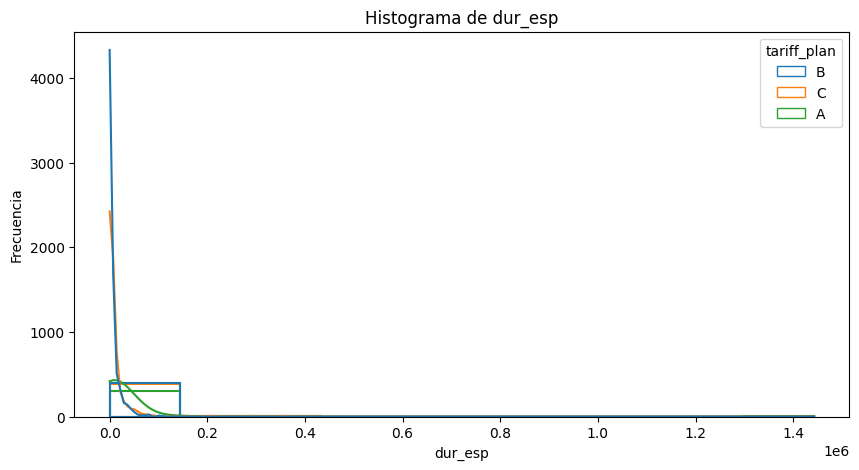

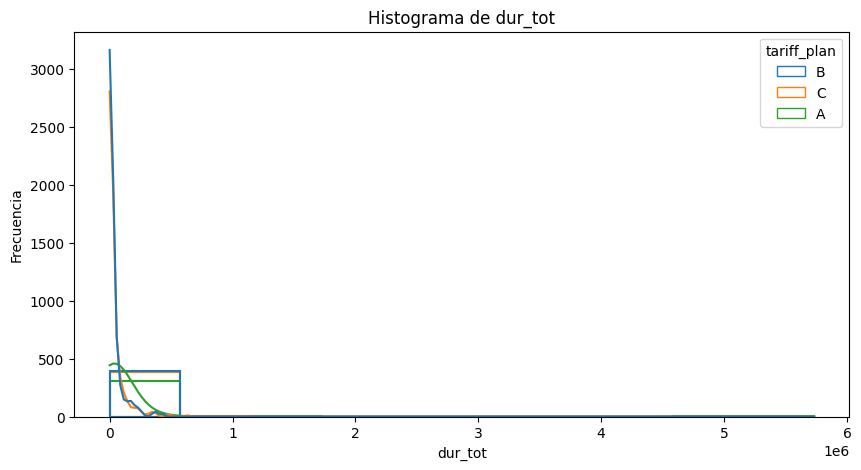

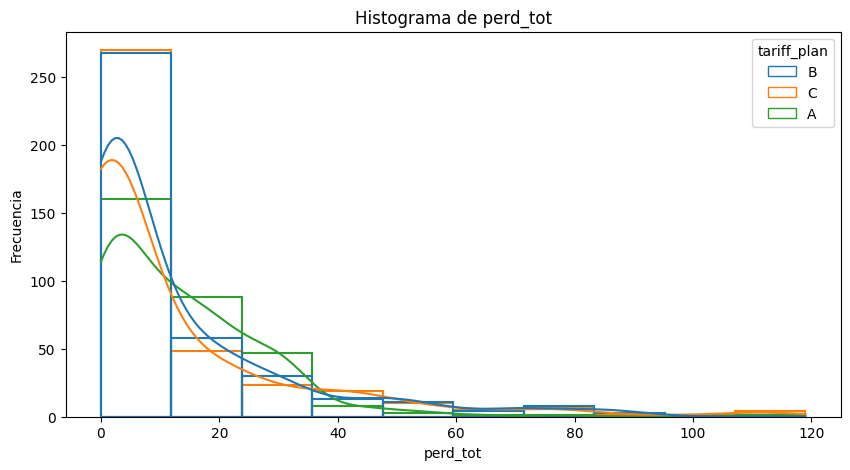

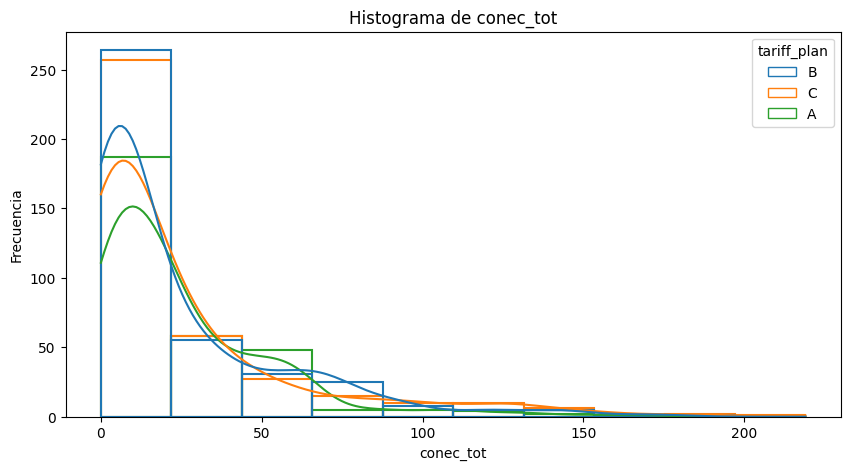

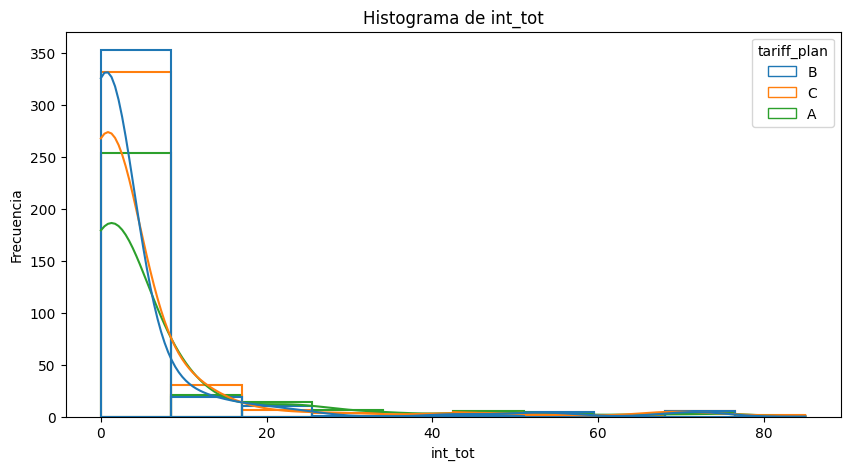

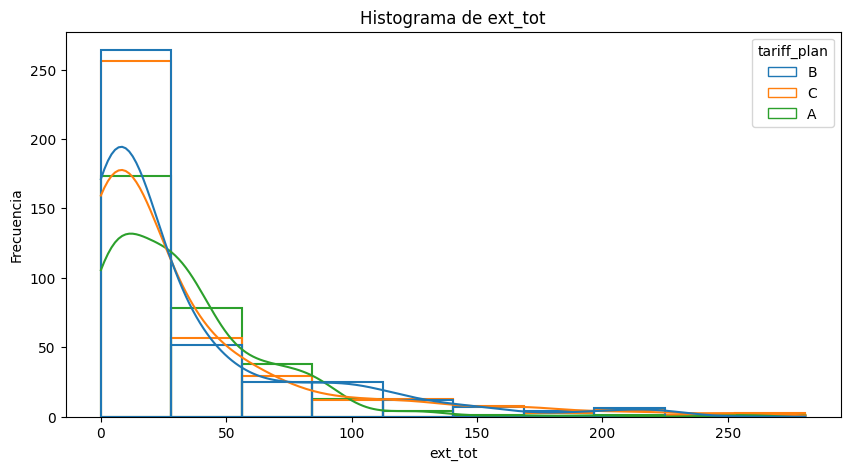

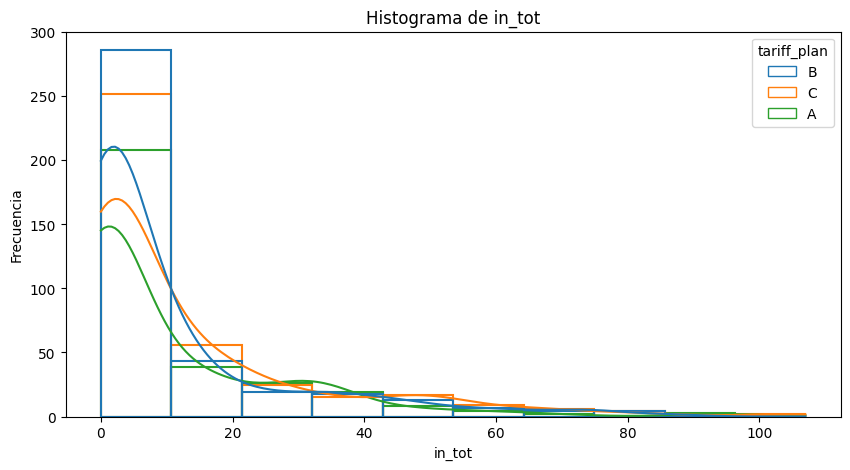

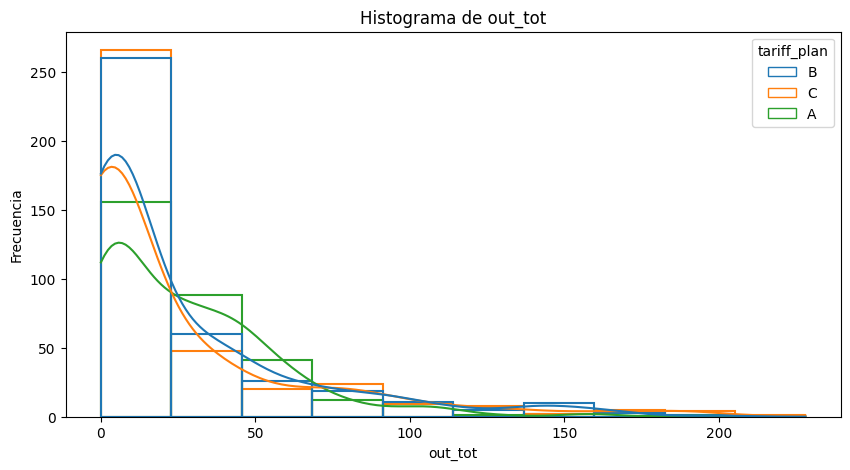

In [27]:
# Realizamos gráficos histogramas de la frecuencia con la que ocurren los distintos valores de cada columna.
for col in operadores.columns[1:11]:
    x = operadores[col]
    plt.figure(figsize=(10, 5))
    sns.histplot(operadores, x=x, bins=10, stat='count', element='bars',
                 fill=False, kde=True, hue='tariff_plan')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

#### Conclusiones preliminares.

Al analizar los datos estadísticos y los gráficos que hemos presentado, se aprecia que, principalmente en los grupos B y C, existe la posibilidad de contar con registros *outliers*, pues, por ejemplo, en la duración de las llamadas, tenemos algunos usuarios con duraciones extraordinarias. Se revisarán los datos para eliminar los registros que puedan estar cuasando errores en la interpretación de la información de modo que podamos comprender mejor los factores que pueden o no hacer que un operador sea considerado ineficiente en su trabajo.

Así mismo, para no perder información, los operadores que cuenten con registros extraordinarios en la duración de sus llamadas se agruparán en una lista para que el supervisor pueda validar "en campo" la razón del aparente problema.

#### Búsqueda de registros *outliers*.

<Figure size 1000x600 with 0 Axes>

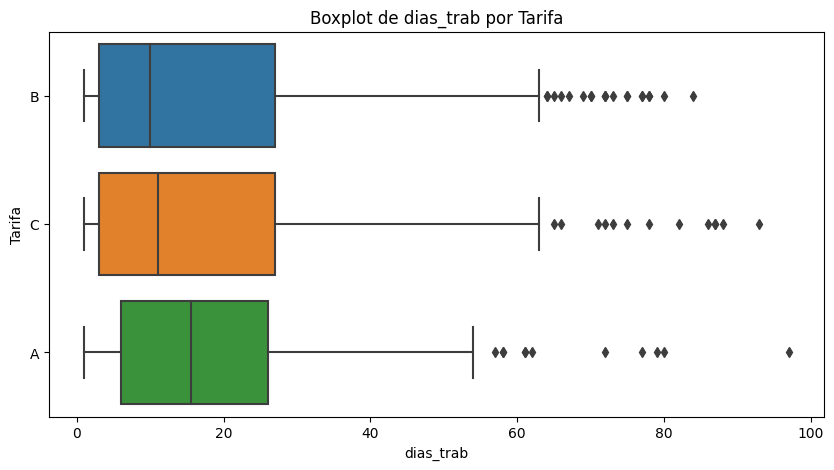

Hay 54 registros de dias_trab con valores 'extraordinarios'.


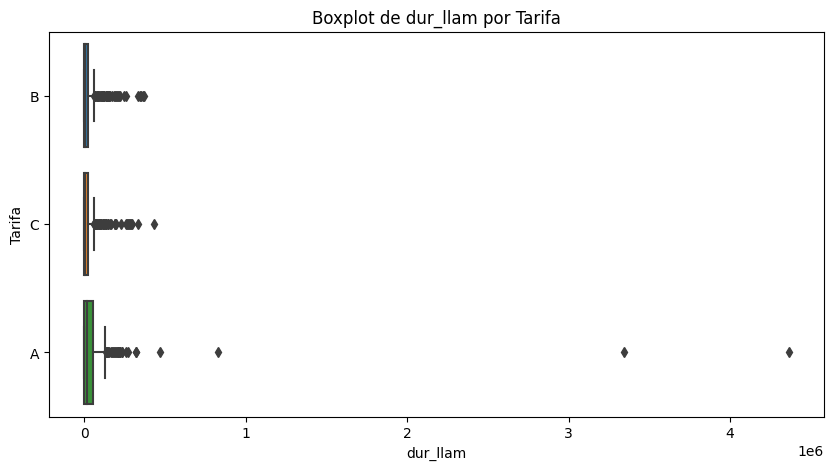

Hay 122 registros de dur_llam con valores 'extraordinarios'.


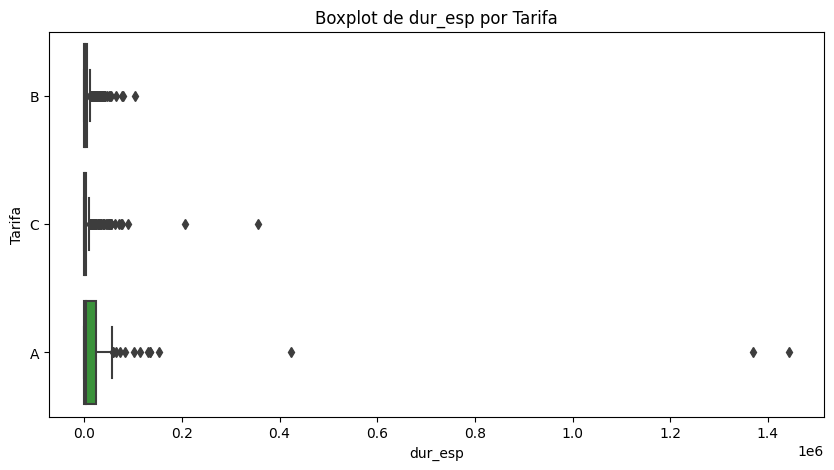

Hay 177 registros de dur_esp con valores 'extraordinarios'.


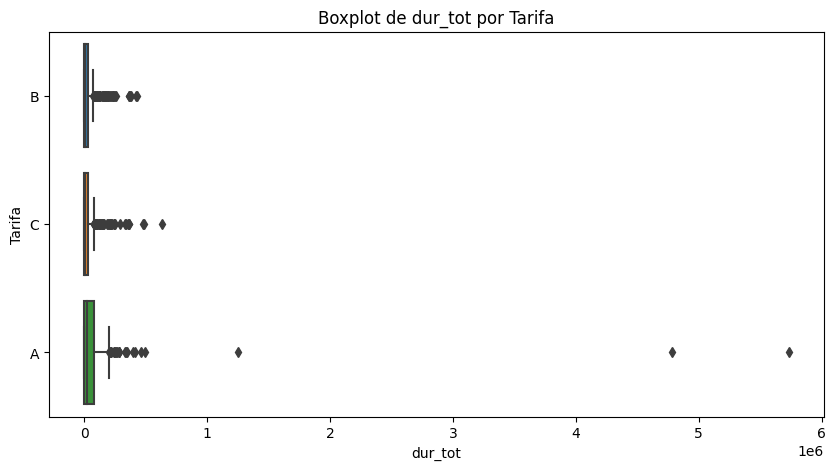

Hay 125 registros de dur_tot con valores 'extraordinarios'.


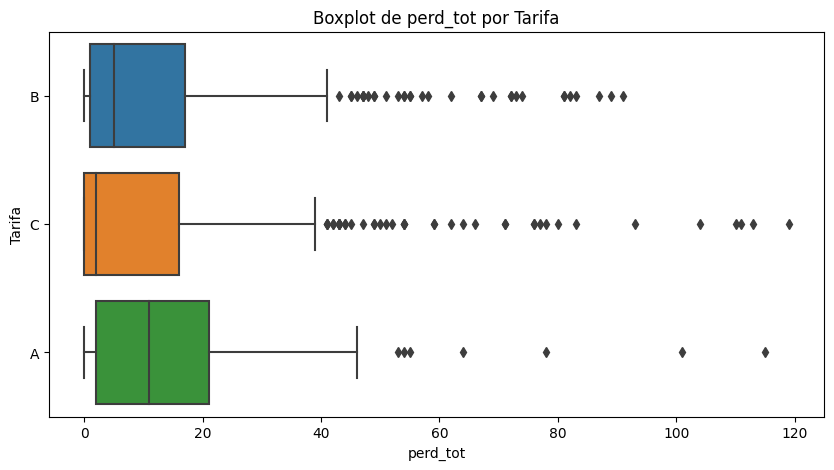

Hay 76 registros de perd_tot con valores 'extraordinarios'.


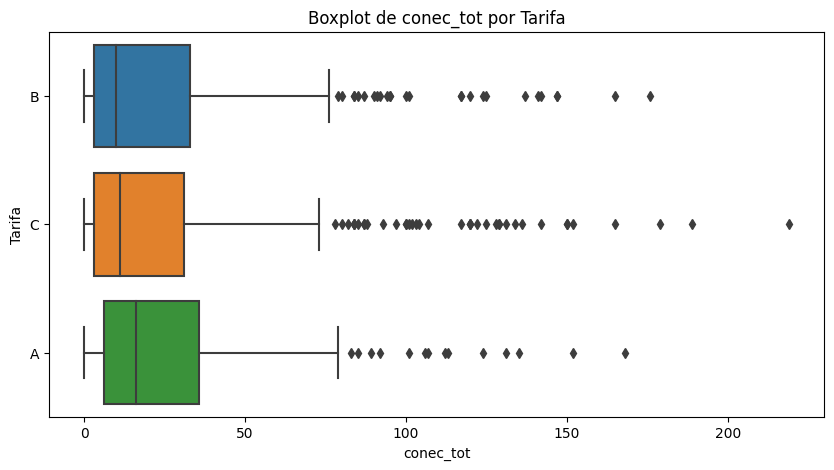

Hay 80 registros de conec_tot con valores 'extraordinarios'.


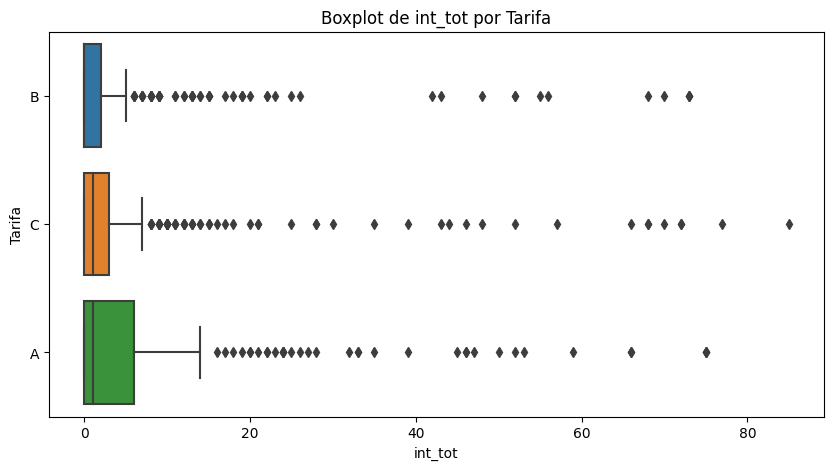

Hay 173 registros de int_tot con valores 'extraordinarios'.


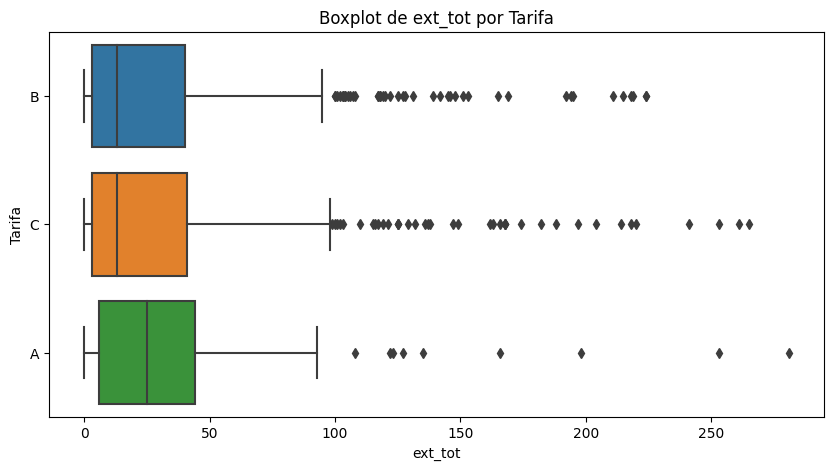

Hay 92 registros de ext_tot con valores 'extraordinarios'.


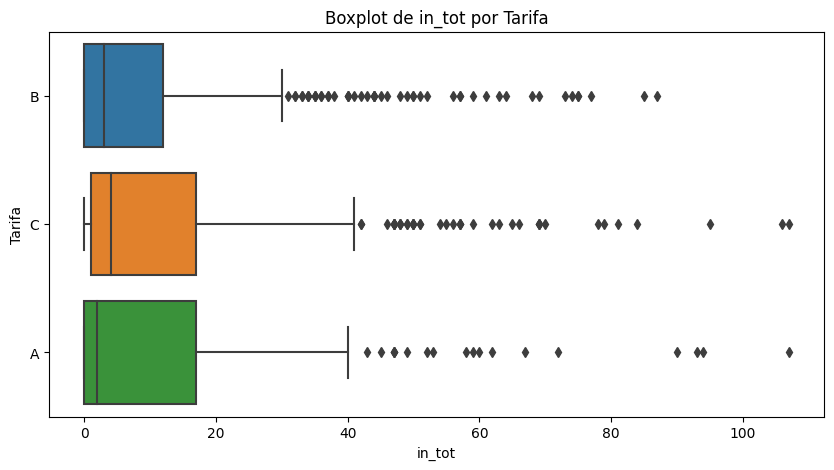

Hay 102 registros de in_tot con valores 'extraordinarios'.


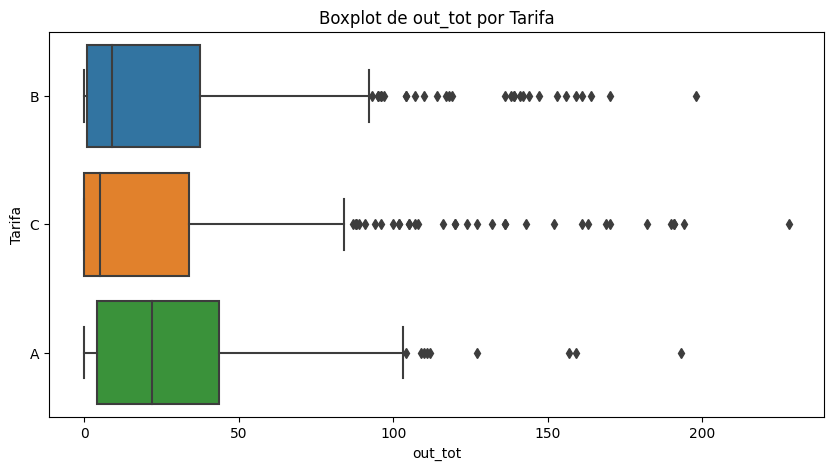

Hay 66 registros de out_tot con valores 'extraordinarios'.


In [28]:
# Graficamos para identificar los outliers.
plt.figure(figsize=(10, 6))
for col in operadores.columns[1:11]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=operadores[col], y=operadores['tariff_plan'])
    plt.title(f'Boxplot de {col} por Tarifa')
    plt.xlabel(col)
    plt.ylabel('Tarifa')
    plt.show()

    # Cálculo de cantidad de valores extraordinarios:
    q1 = operadores[col].quantile(0.25)
    q3 = operadores[col].quantile(0.75)
    IQR = q3 - q1
    sup_fence = q3 + IQR * 1.5
    ol = len(operadores[operadores[col] >= sup_fence])
    print(f"Hay {ol} registros de {col} con valores 'extraordinarios'.")

    # Marcamos los outliers en el DataFrame.
    operadores[f'{col}_outlier'] = np.where(operadores[col] >= sup_fence, 1, 0)

##### Conclusiones parciales:

Mediante los gráficos anteriores, podemos concluir que, de acuerdo con lo planteado en la hipótesis, los operadores de usuarios del plan A **SI pasan más tiempo en llamadas**; sin embargo también son estos operadores los que acumulan mayores tiempos de espera.

Por lo anterior, podemos aceptar **parcialmente** nuestra hipótesis inicial.

#### Filtrado de los registros outliers.

In [29]:
# Obtenemos el total de veces que un registro es outlier.
operadores['outlier_count'] = operadores[[f'{col}_outlier' for col in operadores.columns[1:11]]].sum(axis=1)

# Mostramos el resumen de los outliers con un conteo de operadores por número de outliers.
outlier_summary = operadores['outlier_count'].value_counts().reset_index()
outlier_summary.columns = ['Número de Outliers', 'Cantidad de Operadores']

# Mostramos el resumen de outliers.
print(outlier_summary)

    Número de Outliers  Cantidad de Operadores
0                    0                     729
1                    1                     171
2                    3                      57
3                    2                      38
4                    4                      23
5                    9                      22
6                    5                      17
7                    7                      12
8                   10                       9
9                    8                       8
10                   6                       6


In [30]:
# En vista de la información obtenida, nos quedaremos con los operadores que tienen hasta 3 registros como outliers.
operadores_filt = operadores[operadores['outlier_count'] <= 3]

# Obtenemos el tamaño del nuevo DF:
print(f"Tamaño del DataFrame filtrado: {operadores_filt.shape}")

Tamaño del DataFrame filtrado: (995, 25)


### Feature selection / Selección de características.

En esta sección se identificarán las características más relevantes respecto a si un operador está siendo ineficiente o no. Con esto podremos confirmar o negar nuestra hipótesis inicial.

Para poder realizar una selección de características, lo primero que deberemos hacer es crear una variable objetivo, en este caso, una identificación del si se considera como ineficiente o no al operador en cuestión.

Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

Por lo anterior, realizaremos los siguientes cálculos para obtener a nuestra variable objetivo:
1) Obtendremos el valor del percentil 90 (los operadores que se encuentran dentro del 10% mayor) para las llamadas perdidas totales y para el tiempo de espera total.
2) Obtendremos el valor del percentil 10 (los operadores que se encuentran dentro del 10% menor) para el número de llamadas salientes.
3) Los operadores que se encuentren en los tres grupos serán identificados como ineficientes (1), los demás no (0).

In [31]:
operadores_filt.columns

Index(['id_operador', 'dias_trab', 'dur_llam', 'dur_esp', 'dur_tot',
       'perd_tot', 'conec_tot', 'int_tot', 'ext_tot', 'in_tot', 'out_tot',
       'usuarios_tot', 'id_cliente', 'tariff_plan', 'dias_trab_outlier',
       'dur_llam_outlier', 'dur_esp_outlier', 'dur_tot_outlier',
       'perd_tot_outlier', 'conec_tot_outlier', 'int_tot_outlier',
       'ext_tot_outlier', 'in_tot_outlier', 'out_tot_outlier',
       'outlier_count'],
      dtype='object')

In [32]:
# Quitaremos columnas que no son relevantes en este momento.
col_quitar = ['dias_trab', 'dur_tot', 'int_tot', 'ext_tot',
       'usuarios_tot', 'id_cliente', 'tariff_plan', 'dias_trab_outlier',
       'dur_llam_outlier', 'dur_esp_outlier', 'dur_tot_outlier',
       'perd_tot_outlier', 'conec_tot_outlier', 'int_tot_outlier',
       'ext_tot_outlier', 'in_tot_outlier', 'out_tot_outlier',
       'outlier_count']

operadores_filt = operadores_filt.drop(columns=col_quitar)

# Revisamos las columnas restantes.
print(f"Columnas restantes: {operadores_filt.columns.tolist()}")

Columnas restantes: ['id_operador', 'dur_llam', 'dur_esp', 'perd_tot', 'conec_tot', 'in_tot', 'out_tot']


In [33]:
# Quitaremos a los operadores que no tienen llamadas salientes, su duración de llamadas (dur_llam) igual a 0 y llamadas entrantes igual a 0 para calcular los percentiles.
operadores_filt_perc = operadores_filt[(operadores_filt['out_tot'] > 0) & (operadores_filt['dur_llam'] > 0) & (operadores_filt['in_tot'] > 0)]

# Obtenemos el percentil 90 de las llamadas perdidas entre las entrantes totales.
perd_90 = operadores_filt_perc['perd_tot'].quantile(0.90)

# Obtenemos el percentil 90 del tiempo de espera entre el tiempo de llamada.
esp_90 = operadores_filt_perc['dur_esp'].quantile(0.90)

# Obtenemos el percentil 10 del número de llamadas salientes.
out_10 = operadores_filt_perc['out_tot'].quantile(0.10)

# Imprimimos los percentiles calculados.
print(f"Percentil 90 de llamadas perdidas: {perd_90:.2f}")
print(f"Percentil 90 del tiempo de espera: {esp_90:.2f}")
print(f"Percentil 10 del número de llamadas salientes: {out_10:.2f}")

Percentil 90 de llamadas perdidas: 28.00
Percentil 90 del tiempo de espera: 13624.40
Percentil 10 del número de llamadas salientes: 2.00


In [47]:
# Hacemos un ciclo por todos los operadores y a quienes cumplan con alguna de las tres características les asignamos 1 en la nueva columna "ineficiente", los demás 0.
for i, row in operadores_filt.iterrows():
    if (row['perd_tot'] >= perd_90) or (row['dur_esp'] >= esp_90) or (row['out_tot'] <= out_10):
        operadores_filt.at[i, 'ineficiente'] = 1
    else:
        operadores_filt.at[i, 'ineficiente'] = 0

# Contamos cuantos operadores son ineficientes.
ineficientes_count = operadores_filt['ineficiente'].value_counts().get(1, 0)
print(f"Cantidad de operadores ineficientes: {ineficientes_count}")

Cantidad de operadores ineficientes: 527


Ya tenemos nuestra variable objetivo y vemos que aproximadamente el 60% de los operadores son ineficientes para nuestro registro de operadores filtrados. Procedemos a usar un método tipo "Wraper" para elegir las características que guardan más relación con la variable objetivo.

In [48]:
# Copiamos los datos filtrados exceptuando la columna 'ineficiente' para usarlo en el modelo.
col_mantener = ['dur_llam', 'dur_esp', 'perd_tot', 'conec_tot', 'in_tot', 'out_tot']

# Creamos un nuevo DataFrame con las columnas seleccionadas.
operadores_model = operadores_filt[col_mantener].copy() # Esto será nuestra X para el modelo.

# Creamos el df con la variable objetivo.
operadores_var_obj = operadores_filt['ineficiente'].copy() # Esta será nuestra Y para el modelo.

In [49]:
# Iniciamos estandarizando los datos de las características (X).
scaler = StandardScaler()
X_scaled = scaler.fit_transform(operadores_model)

In [50]:
# Usamos la función linkage para crear una matriz de distancias jerárquicas.
linked = linkage(X_scaled, method = 'ward')

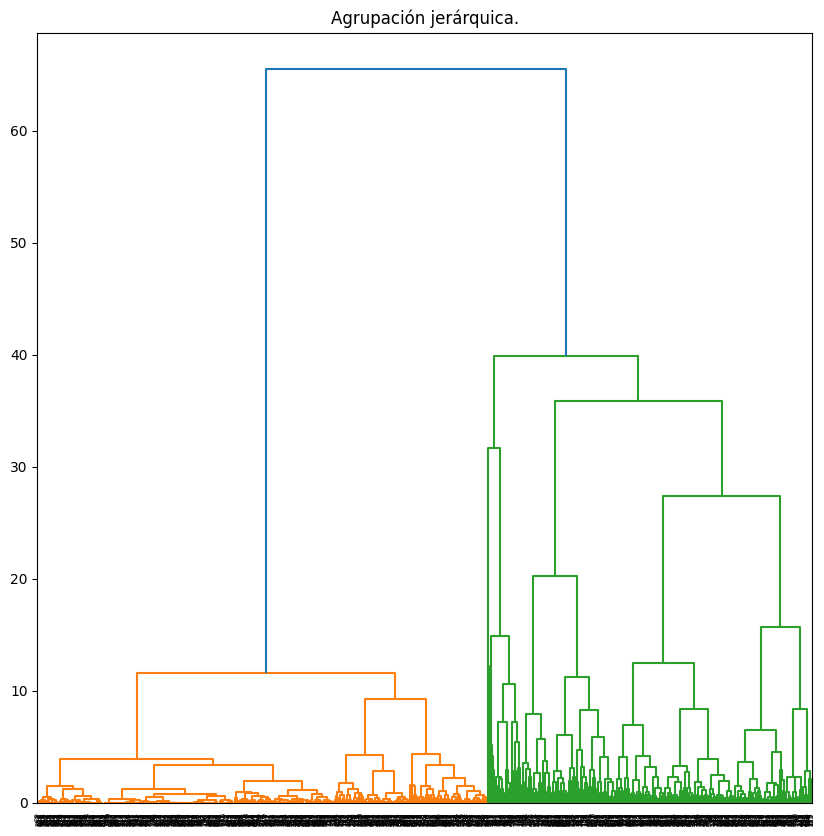

In [51]:
# Graficamos el dendrograma.
plt.figure(figsize=(10,10))
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica.')
plt.show()

Con el dendograma anterior, hemos confirmado que nuestros operadores pueden ser clasificados en dos grupos como clasificación óptima. En nuestro caso, *ineficientes* y *eficientes*.

In [52]:
# Obtenemo la matrz de correlación con el método corr().
mat_corr = operadores_filt.corr()

<AxesSubplot: >

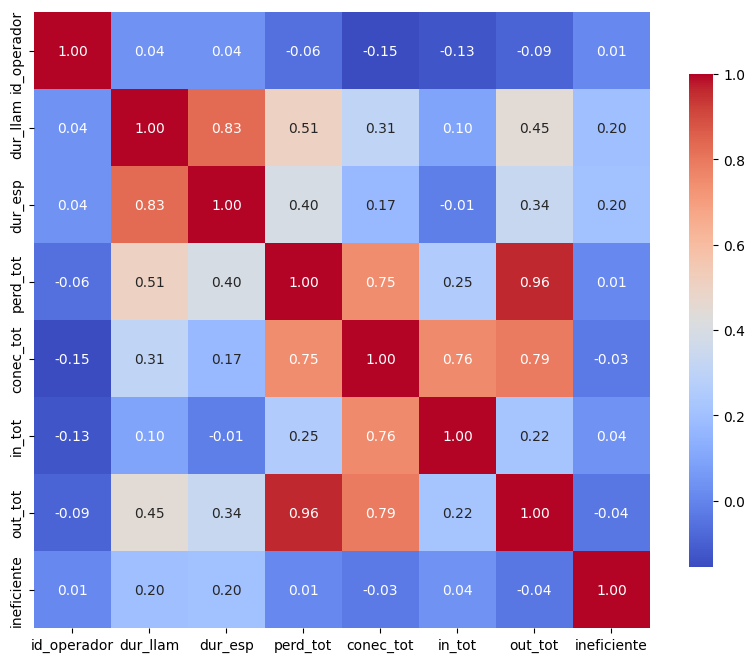

In [53]:
# Graficamos la matrix de correlación con un "heatmap" de Seaborn donde azul será una correlación cercana a 0 y rojo una correlación cercana a +- 1 (valor absoluto de 1).
plt.figure(figsize=(10, 8))
sns.heatmap(mat_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

Vemos que todas las variables guardan poca correlación con nuestra variable objetivo, sin embargo, de acuerdo con la defiinición de "operador ineficiente" de nuestro client CMM, se decide mantener las columnas (variables) del datafram de Operadores (filtrados) como las caracterísitcas más significativas.

### Visualización de las características.

Mediante el método describe visualizamos las diferencias estadísticas entre nuestros dos grupos.

In [54]:
# Revisamos a los operadores ineficientes.
operadores_filt[operadores_filt["ineficiente"] == 1].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id_operador,527.0,927666.19,21995.33,880022.0,909964.0,929332.0,945289.0,973286.0
dur_llam,527.0,29607.40,62604.20,0.0,135.5,1738.0,38140.5,828782.0
dur_esp,527.0,11892.61,31848.55,0.0,47.5,418.0,15257.0,423767.0
perd_tot,527.0,8.77,12.72,0.0,0.0,1.0,17.0,53.0
conec_tot,527.0,17.05,20.39,0.0,2.0,9.0,24.5,106.0
in_tot,527.0,8.53,13.36,0.0,0.0,2.0,11.0,67.0
out_tot,527.0,17.29,26.45,0.0,0.0,1.0,33.0,116.0
ineficiente,527.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0


In [55]:
# Revisamos a los operadores eficientes.
operadores_filt[operadores_filt["ineficiente"] == 0].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id_operador,468.0,927128.54,23072.40,880020.0,907179.50,929880.0,944518.00,972460.0
dur_llam,468.0,10776.14,14786.63,0.0,1096.25,5124.5,13949.75,118018.0
dur_esp,468.0,2246.76,2929.54,4.0,273.25,971.0,3118.50,13592.0
perd_tot,468.0,8.52,7.02,0.0,3.00,6.0,13.00,27.0
conec_tot,468.0,18.17,17.68,0.0,5.00,12.0,26.00,100.0
in_tot,468.0,7.55,10.75,0.0,0.00,2.0,11.00,65.0
out_tot,468.0,19.13,16.91,3.0,6.00,13.0,29.00,84.0
ineficiente,468.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0


En base a lo anterior, se realiza un gráfico de dispersión (puntos) en el cual, el eje X representará la cantidad de llamadas perdidas, en el eje Y el tiempo de espera, el tamaño del círculo definido por la cantidad de llamadas salientes y el color representanto a los operadores ineficientes o no.

<AxesSubplot: xlabel='perd_tot', ylabel='dur_esp'>

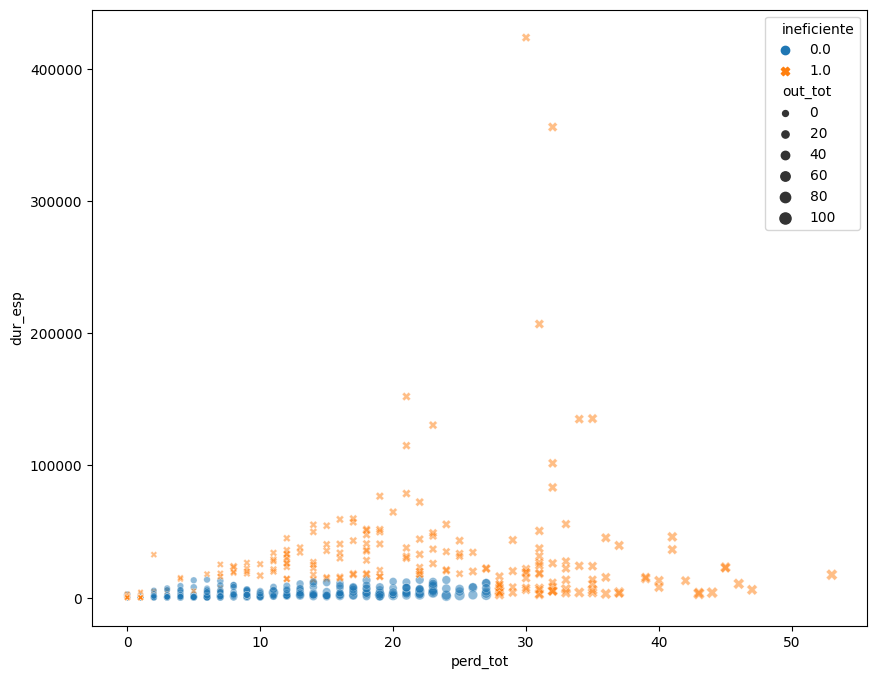

In [56]:
# Realizamos un diagrama de dispersión.
plt.figure(figsize=(10, 8))
sns.scatterplot(data=operadores_filt, x="perd_tot", y="dur_esp", hue="ineficiente",
                size="out_tot",style="ineficiente",alpha=0.5)

### Modelos de agrupación binaria.

Utilizaremos dos modelos de agrupación binaria para poder clasificar a nuestros usuarios y probaremos cual es el mejor para decidir mantenerlo.

In [58]:
# Dividimos los datos en conjuntos de entrenamiento y prueba.
X = operadores_model
y = operadores_var_obj

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Logistic Regression.

Este es un modelo de la librería Scientific Learn Kit que es especialmente bueno para clasificaciones binarias, por esto se ha seleccionado.

In [59]:
# Establecemos el modelo de clasificación binaria LogisticRegression.
model_log_reg = LogisticRegression(solver="liblinear") # Se elige liblinear al ser la opción binaria en la documentación de sklearn.

In [60]:
# Entrenamos el modelo de regresión logística.
model_log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [61]:
# Realizamos las predicciones con el modelo utilizando el subconjunto de prueba.
pred_log_reg = model_log_reg.predict(X_test)

##### Matriz de confusión y métricas del modelo.

Obtenemos las métricas para comparar los modelos.

In [62]:
# Obtenemos la matriz de confusión.
mat_conf_log_reg = confusion_matrix(y_test, pred_log_reg)
TN, FP, FN, TP = mat_conf_log_reg.ravel()

# Presentamos la matriz de confusión.
print(mat_conf_log_reg)

[[73 19]
 [38 69]]


In [63]:
# Cálculo de las métricas de rendimiento del modelo de regresión logística.
ex_log_reg = accuracy_score(y_test, pred_log_reg)
prec_log_reg = precision_score(y_test, pred_log_reg)
rec_log_reg = recall_score(y_test, pred_log_reg)
f1_log_reg = f1_score(y_test, pred_log_reg)

# Presentamos las métricas de rendimiento del modelo de regresión logística.
print(f"Exactitud: {ex_log_reg:.2f}")
print(f"Precisión: {prec_log_reg:.2f}")
print(f"Exhaustividad/Recall: {rec_log_reg:.2f}")
print(f"Puntuación F1: {f1_log_reg:.2f}")

Exactitud: 0.71
Precisión: 0.78
Exhaustividad/Recall: 0.64
Puntuación F1: 0.71


#### Random Forest Classifier.

Este algoritmo de la misma librería (scikitlearn) es un buen clasificador que trabaja bajo los principios de un bosque aleatorio.

In [64]:
# Establecemos el modelo de clasificación binaria LogisticRegression.
model_rand_for = RandomForestClassifier()

In [65]:
# Entrenamos el modelo de regresión logística.
model_rand_for.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
# Realizamos las predicciones con el modelo utilizando el subconjunto de prueba.
pred_rand_for = model_rand_for.predict(X_test)

##### Matriz de confusión y métricas del modelo.

In [67]:
# Obtenemos la matriz de confusión.
mat_conf_rand_for = confusion_matrix(y_test, pred_rand_for)
TN, FP, FN, TP = mat_conf_rand_for.ravel()

# Presentamos la matriz de confusión.
print(mat_conf_rand_for)

[[ 92   0]
 [  0 107]]


In [68]:
# Cálculo de las métricas de rendimiento del modelo de regresión logística.
ex_rand_for = accuracy_score(y_test, pred_rand_for)
prec_rand_for = precision_score(y_test, pred_rand_for)
rec_rand_for = recall_score(y_test, pred_rand_for)
f1_rand_for = f1_score(y_test, pred_rand_for)

# Presentamos las métricas de rendimiento del modelo de regresión logística.
print(f"Exactitud: {ex_rand_for:.2f}")
print(f"Precisión: {prec_rand_for:.2f}")
print(f"Exhaustividad/Recall: {rec_rand_for:.2f}")
print(f"Puntuación F1: {f1_rand_for:.2f}")

Exactitud: 1.00
Precisión: 1.00
Exhaustividad/Recall: 1.00
Puntuación F1: 1.00


#### Conclusiones del modelo.

Debido a mejores métricas de Exhaustividad y F1, el modelo elegido será Random Forest Classifier; con este algoritmo se podrán agrupar a los operadores ineficientes y eficientes para que los supervisores los identifiquen de forma sencilla.

Tanto por la relación lógica como por su suficiencia para construir un modelo de agrupación binario con buenos indicadores (exactitud, presición, exhaustividad y F1), el número de llamadas entrantes, número de llamadas salientes, duración de la llamada, duración de la espera, llamadas perdidas y llamadas conectadas, resultaron ser las características necesarias para poder identificar a los operadores ineficientes. Estas características se obtuvieron mediante cálculos de agrupación desde la tabla (DF)  de registro de llamadas por operador.

Se han realizado un Dashboard y un trabajo escrito para complementar este cuaderno de análisis, mismos que se pueden encontrar en la carpeta compartida:
* 

## Documentación consultada.

Durante la elaboración del proyecto se consultaron varias fuentes para poder comprender como mejor escibir el código con el que se trabajaría, las principales 5 han sido:

1) Cómo realizar un buen EDA (Exploratory Data Analysis):
* https://www.ibm.com/es-es/think/topics/exploratory-data-analysis

2) Documentación de la librería Seaborn (importada como sns) para construir un diagrama de dispersión:
* https://seaborn.pydata.org/generated/seaborn.scatterplot.html

3) Documentación de la librería scikit-learn para utilizar el modelo de clasificación Random Forest Classifier:
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

4) Documentación de la librería scikit-learn para utilizar el modelo de clasificación Logistic Regressor:
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

5) Información sobre las métricas de Exactitud, Precisión, Exhaustividad y Puntuación F1 para evaluar modelos:
* https://www.datasource.ai/es/data-science-articles/metricas-de-evaluacion-de-modelos-en-el-aprendizaje-automatico